# Analysez des données de systèmes éducatifs

## 1/ Chargement des packages et du dataset principal EdStatsData.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
with zipfile.ZipFile('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv.zip') as zip_folder:
    with zip_folder.open('EdStatsData.csv') as myZip:
        data = pd.read_csv(myZip) 
data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2/ Comprendre la structure du dataset, informations en lignes / colonnes ?
 - Nous avons 886,930 lignes et 70 colonnes (en réalité 69, il semble y avoir une erreur lors du chargement de la base de données avec la colonne 'Unnamed: 69')
 - Nous avons 65 variables quantitatives et 4 varibles qualitatives
 - Il y a beaucoup de données manquantes dans les variables quantitatives

In [3]:
print(data.shape)
print(data.dtypes.value_counts())

(886930, 70)
float64    66
object      4
dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [5]:
data.drop(columns='Unnamed: 69', inplace=True)
#Modification de l'orthographe de certains pays pour éviter les erreurs de croisement de dataframes
data.replace({'Country Name':{"Cote d'Ivoire":"Côte d'Ivoire",
                              'Korea, Dem. People’s Rep.':'Korea, Dem. Rep.'}}, inplace=True)

## 3/ Analyse des données manquantes
- Quasiment toutes les années ont moins 80% de données manquantes

In [6]:
#Visualisation de toutes les valeurs manquantes du dataset
#plt.figure(figsize=(12, 12))
#heatmap_nan = sns.heatmap(data.isna())
#heatmap_nan

In [7]:
#heatmap_nan.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/heatmp_nan.png')

In [8]:
(data.isna().mean()).sort_values(ascending=False)

2017              0.999839
2016              0.981442
1971              0.959933
1973              0.959924
1972              0.959840
                    ...   
2010              0.726650
Country Code      0.000000
Indicator Code    0.000000
Indicator Name    0.000000
Country Name      0.000000
Length: 69, dtype: float64

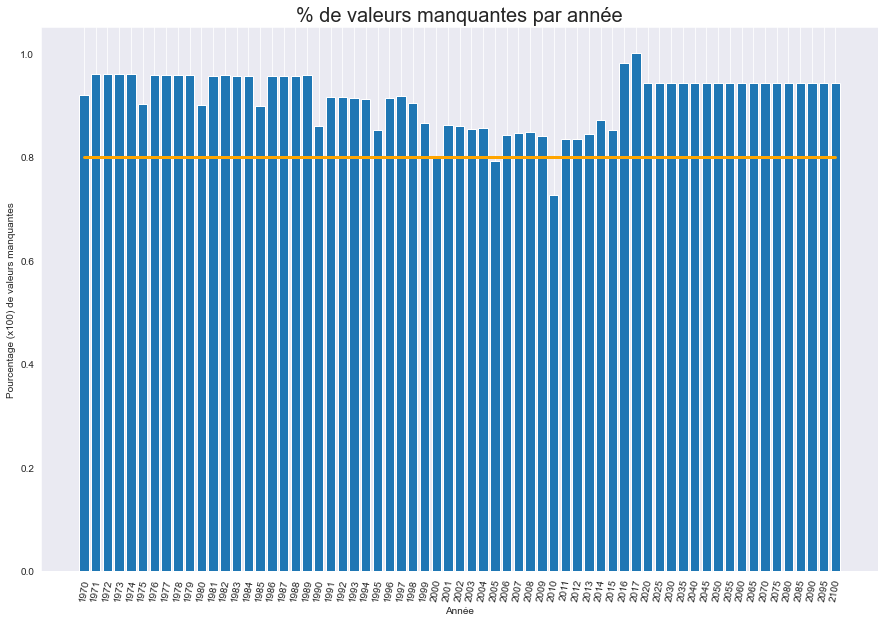

In [9]:
#Visualisation des valeurs manquantes pour chaque année
data_years = data.select_dtypes(include='float64').copy()

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
plt.bar(data_years.columns, data_years.isna().mean())
plt.grid(axis='y')
plt.plot(data_years.columns, [0.8]*len(data_years.columns), color='orange', linewidth=3)
plt.xlabel('Année')
plt.ylabel('Pourcentage (x100) de valeurs manquantes')
plt.xticks(rotation=80)
plt.title('% de valeurs manquantes par année', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/bar_year_nan.png', bbox_inches='tight')
plt.show()

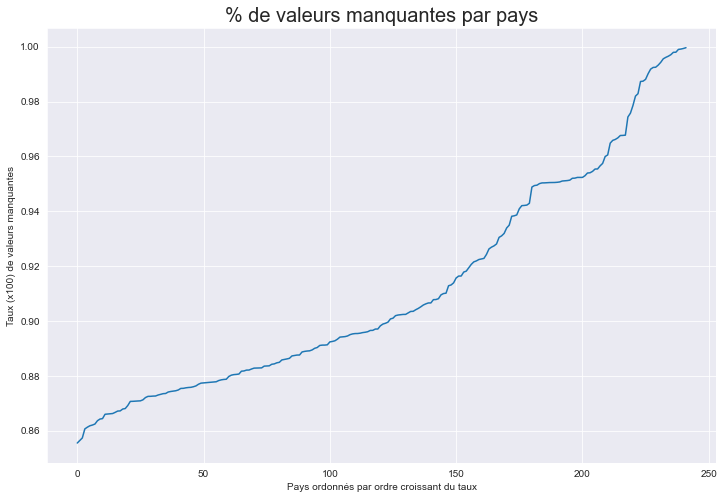

In [10]:
#Visualisation des valeurs manquantes par pays
years_features = data.select_dtypes(include='float64').columns.tolist()

countries_nan = data.groupby('Country Name')[years_features].agg(lambda x: x.isna().mean())
countries_nan['% Total NaN'] = countries_nan.mean(axis=1)

countries_nan.sort_values(by='% Total NaN', inplace=True)

plt.figure(figsize=(12, 8))
plt.plot(range(countries_nan.shape[0]), countries_nan['% Total NaN'])
plt.title('% de valeurs manquantes par pays', fontsize=20)
plt.xlabel('Pays ordonnés par ordre croissant du taux')
plt.ylabel('Taux (x100) de valeurs manquantes')
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/line_country_nan.png', bbox_inches='tight')
plt.show()

## 4/ Combien avons nous d'indicateurs uniques ? combien de pays uniques ? combien d'années ?
- Nous avons 3665 indicateurs, 242 pays et 66 années
- Nous n'avons pas de dupliqué

In [11]:
#Nombre d'indicateurs et pays unique
print(len(data['Indicator Name'].unique()))
print(len(data['Country Name'].unique()))

#Nombre de dupliqués avec 'Country Name' et 'Indicator Name'
print(data.duplicated(['Country Name', 'Indicator Name']).sum())

3665
242
0


## 5/ Nettoyage des pays : suppression des années avant 2000 et après 2020, des petits pays et des pays étant des régions géographiques
- Après nettoyage, nous avons 88 pays restants (nous avons gardé les pays ayant au moins 10,000,000 d'habitants)

In [12]:
#data['Country Name'].unique()
#data.columns

In [13]:
#Supprimons les années avant 2000 et les années futures
data_cleaned = data.drop(columns=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978','1979', 
                                  '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', 
                                  '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                                  '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', 
                                  '2075', '2080', '2085', '2090', '2095', '2100']).copy()

In [14]:
#Supprimons les entrées qui ne sont pas des pays
not_a_country = ['Arab World', 'East Asia & Pacific',
                 'East Asia & Pacific (excluding high income)', 'Euro area',
                 'Europe & Central Asia',
                 'Europe & Central Asia (excluding high income)', 'European Union',
                 'Heavily indebted poor countries (HIPC)', 'High income',
                 'Latin America & Caribbean',
                 'Latin America & Caribbean (excluding high income)',
                 'Least developed countries: UN classification',
                 'Low & middle income', 'Low income', 'Lower middle income',
                 'Middle East & North Africa',
                 'Middle East & North Africa (excluding high income)',
                 'Middle income', 'North America', 'OECD members', 'South Asia',
                 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
                 'Upper middle income', 'World']

data_cleaned = data_cleaned[~data_cleaned['Country Name'].isin(not_a_country)]

In [15]:
#Recherche de l'indicateur renseignant au mieux sur la population
#data.loc[data['Indicator Name'].str.contains('Population'), 'Indicator Name'].unique()

In [16]:
#Taux de données manquantes pour l'indicateur 'Population, total'
data_cleaned[data_cleaned['Indicator Name']=='Population, total'].isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2000              0.009217
2001              0.009217
2002              0.009217
2003              0.009217
2004              0.009217
2005              0.009217
2006              0.009217
2007              0.009217
2008              0.009217
2009              0.009217
2010              0.009217
2011              0.009217
2012              0.013825
2013              0.013825
2014              0.032258
2015              0.032258
2016              0.032258
2017              1.000000
2020              1.000000
dtype: float64

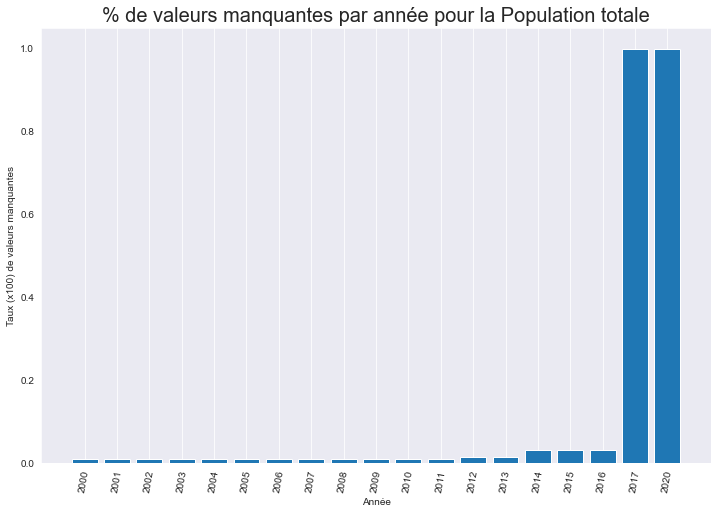

In [17]:
#Visualisation des valeurs manquantes pour chaque année pour la Population totale
data_pop = data_cleaned[data_cleaned['Indicator Name']=='Population, total'].copy()
data_pop_years = data_pop.select_dtypes(include='float64').copy()

plt.figure(figsize=(12, 8))
plt.bar(data_pop_years.columns, data_pop_years.isna().mean())
plt.grid(axis='y')
plt.xlabel('Année')
plt.ylabel('Taux (x100) de valeurs manquantes')
plt.xticks(rotation=80)
plt.title('% de valeurs manquantes par année pour la Population totale', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/bar_pop_nan.png', bbox_inches='tight')
plt.show()

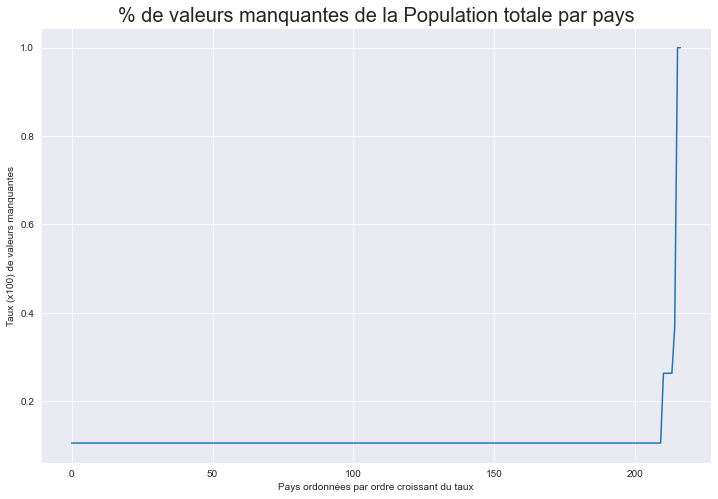

In [18]:
#Visualisation des valeurs manquantes par pays de l'indicateur Population totale
years_pop_features = data_pop.select_dtypes(include='float64').columns.tolist()

countries_pop_nan = data_pop.groupby('Country Name')[years_pop_features].agg(lambda x: x.isna().mean())
countries_pop_nan['% Total NaN'] = countries_pop_nan.mean(axis=1)

countries_pop_nan.sort_values(by='% Total NaN', inplace=True)

plt.figure(figsize=(12, 8))
plt.plot(range(countries_pop_nan.shape[0]), countries_pop_nan['% Total NaN'])
plt.title('% de valeurs manquantes de la Population totale par pays', fontsize=20)
plt.xlabel('Pays ordonnées par ordre croissant du taux')
plt.ylabel('Taux (x100) de valeurs manquantes')
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/line_pop_nan.png', bbox_inches='tight')
plt.show()

In [19]:
#Cherchons la dernière année renseignant la population totale de chaque pays
data_pop['Population Total'] = data_pop[years_pop_features].idxmax(axis=1).values
data_pop.dropna(subset=['Population Total'], inplace=True)
data_pop.reset_index(inplace=True, drop=True)

In [20]:
#Réunissons les valeurs des dernières années en une colonne
for i, j in enumerate(data_pop['Population Total']):
    data_pop.loc[i, 'Population Total'] = data_pop.loc[i, j]

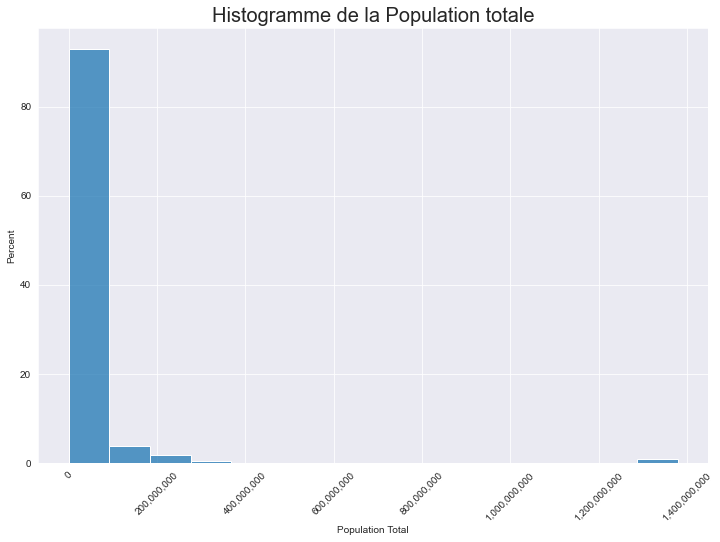

In [21]:
#Visualisation de la distribution de la population totale

plt.figure(figsize=(12, 8))
sns.histplot(data=data_pop, x='Population Total', bins=15, stat='percent')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.title('Histogramme de la Population totale', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/hist_pop_nan.png', bbox_inches='tight')
plt.show()

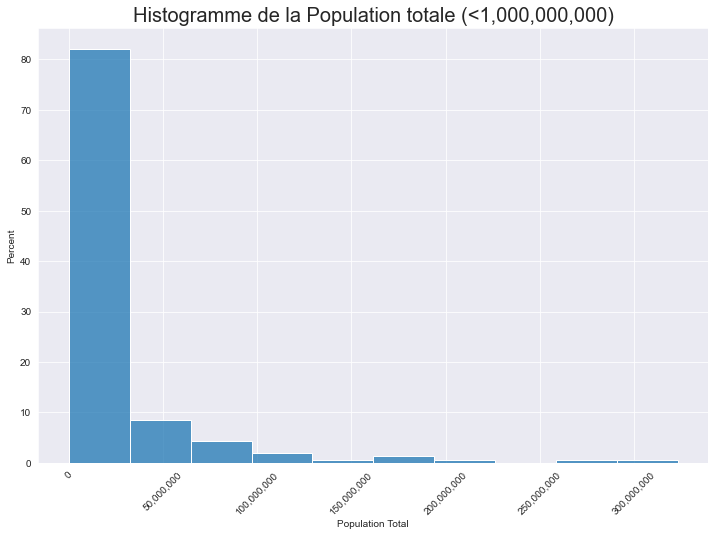

In [22]:
#Zoom en s'intéressant aux pays avec moins d'1,000,000,000 d'habitants
plt.figure(figsize=(12, 8))
sns.histplot(data=data_pop[data_pop['Population Total']<1000000000], x='Population Total', bins=10, stat='percent')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.title('Histogramme de la Population totale (<1,000,000,000)', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/hist_pop_nan_zoom.png', bbox_inches='tight')
plt.show()

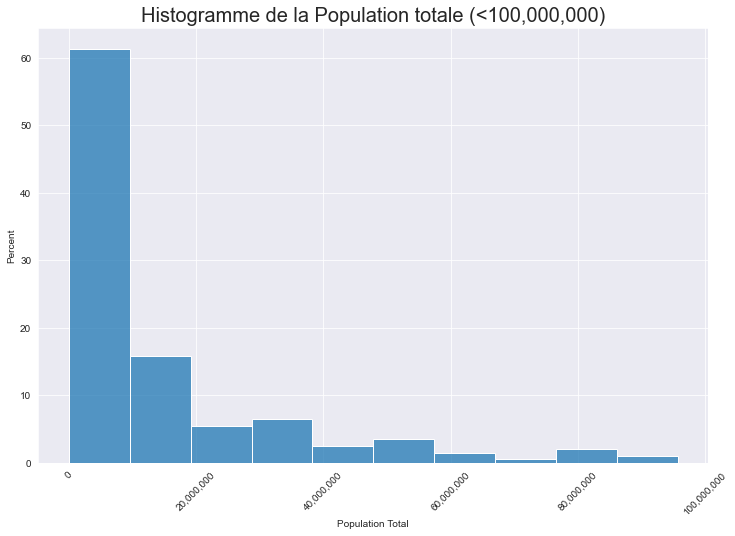

In [23]:
#Zoom en s'intéressant aux pays avec moins de 100,000,000 d'habitants
plt.figure(figsize=(12, 8))
sns.histplot(data=data_pop[data_pop['Population Total']<100000000], x='Population Total', bins=10, stat='percent')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.title('Histogramme de la Population totale (<100,000,000)', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/hist_pop_nan_zoom+.png', bbox_inches='tight')
plt.show()

In [24]:
#Gardons les pays avec au moins 10,000,000 d'habitants
data_pop = data_pop[data_pop['Population Total'] > 10000000]

In [25]:
#Assurrons nous de garder les pays de notre dataframe sur la population
data_cleaned = data_cleaned[data_cleaned['Country Name'].isin(data_pop['Country Name'].unique())]

## 6/ Quel est le taux de remplissage de chaque indicateur ?
- Nous choississons de garder les indicateurs avec un taux de remplissage supérieur à 10%
- Nous allons agréger l'indicateur Barro-Lee sur la population en regroupand les tranches d'âge qui nous intéressent

In [26]:
#Regardons le taux de données manquantes par années
years_features = data_cleaned.select_dtypes(include='float64').columns.tolist()

ind_years = data_cleaned.groupby('Indicator Name')[years_features].agg(lambda x: x.isna().mean())

#Regardons si les dernières années ont beaucoup de données manquantes
print(ind_years['2016'].value_counts())
print('')
print(ind_years['2017'].value_counts())
print('')
print(ind_years['2020'].value_counts())

1.000000    3280
0.954545     116
0.943182      62
0.977273      33
0.988636      33
0.897727      32
0.011364      21
0.250000      18
0.965909      17
0.772727      15
0.068182       9
0.227273       7
0.056818       4
0.022727       4
0.397727       3
0.886364       3
0.034091       2
0.000000       2
0.863636       1
0.386364       1
0.375000       1
0.215909       1
Name: 2016, dtype: int64

1.000000    3625
0.977273      23
0.988636      17
Name: 2017, dtype: int64

1.000000    3357
0.079545     308
Name: 2020, dtype: int64


- Les années 2017 et 2020 peuvent également être supprimées vu le nombre de données manquantes pour chaque indicateur (beaucoup à 100%), comme vu sur le graphique de la population totale

In [27]:
data_cleaned.drop(columns=['2017', '2020'], inplace=True)

- Création de deux indicateurs : agrégation (somme) de l'indicateur Barro-Lee sur la population pour choisir la tranche d'âge qui nous intéresse, ajout de l'indicateur FDI externe au jeu de données

In [28]:
#Recherche des indicateurs Barro-Lee sur la population
data_cleaned.loc[(data_cleaned['Indicator Name'].str.startswith('Barro-Lee: Population')) &
                 (data_cleaned['Indicator Name'].str.endswith('total')), 'Indicator Name'].unique()

array(['Barro-Lee: Population in thousands, age 15+, total',
       'Barro-Lee: Population in thousands, age 15-19, total',
       'Barro-Lee: Population in thousands, age 20-24, total',
       'Barro-Lee: Population in thousands, age 25+, total',
       'Barro-Lee: Population in thousands, age 25-29, total',
       'Barro-Lee: Population in thousands, age 30-34, total',
       'Barro-Lee: Population in thousands, age 35-39, total',
       'Barro-Lee: Population in thousands, age 40-44, total',
       'Barro-Lee: Population in thousands, age 45-49, total',
       'Barro-Lee: Population in thousands, age 50-54, total',
       'Barro-Lee: Population in thousands, age 55-59, total',
       'Barro-Lee: Population in thousands, age 60-64, total',
       'Barro-Lee: Population in thousands, age 65-69, total',
       'Barro-Lee: Population in thousands, age 70-74, total',
       'Barro-Lee: Population in thousands, age 75+, total'], dtype=object)

In [29]:
with zipfile.ZipFile('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv.zip') as Zip_folder:
    with Zip_folder.open('EdStatsCountry.csv') as myZip:
        data_country = pd.read_csv(myZip)
    
data_country.rename(columns={'Table Name':'Country Name'}, inplace=True)

In [30]:
#Agrégation des indicateurs Barro-Lee pour n'en garder qu'un sur notre population cible
years_features = data_cleaned.select_dtypes(include='float64').columns.tolist()

barrolee_ind =['Barro-Lee: Population in thousands, age 15-19, total',
               'Barro-Lee: Population in thousands, age 20-24, total',
               'Barro-Lee: Population in thousands, age 25-29, total']

barrolee_pop = data_cleaned[data_cleaned['Indicator Name'].isin(barrolee_ind)].groupby('Country Name',
                                                                                       as_index=False)[years_features].sum()

barrolee_pop['Indicator Name'] = 'Barro-Lee: Population in thousands, age 15-29, total'
barrolee_pop['Indicator Code'] = 'BAR.POP.1529'
barrolee_pop = barrolee_pop.merge(data_country[['Country Name', 'Country Code']], how='left', 
                                  left_on='Country Name', right_on='Country Name')
barrolee_pop.replace(0, np.nan, inplace=True)

data_cleaned = pd.concat([data_cleaned, barrolee_pop])

In [31]:
#Ajout de l'indicateur FDI
data_fdi = pd.read_excel('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/FDI-in-Figures-April-2022.xlsx', 
                         sheet_name='T6. FDI inward position (%GDP)')
data_fdi.drop(index=[0, 1, 13, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76], 
              columns=['Unnamed: 1'], inplace=True)

data_fdi['Indicator Name'] = 'FDI inward position (%GDP)'
data_fdi['Indicator Code'] = 'FDI.IN.POS'

data_fdi.rename(columns={'Unnamed: 0':'Country Code'}, inplace=True)
data_fdi = data_fdi.astype({2005:'float', 2021:'float'})
data_fdi.rename(columns={y:str(y) for y in data_fdi.select_dtypes(include='float64').columns.tolist()}, inplace=True)

data_fdi = data_fdi.merge(data_country[['Country Code', 'Country Name']], how='left', left_on='Country Code',
                          right_on='Country Code')
data_fdi.dropna(subset=['Country Name'], inplace=True)

#Faisons une copie du dataframe pour la partie sur les projections
data_fdi_bis = data_fdi.copy()

data_fdi.drop(columns=['2017', '2018', '2019', '2020', '2021'], inplace=True)

In [32]:
data_cleaned = pd.concat([data_cleaned, data_fdi])
data_cleaned.reset_index(drop=True, inplace=True)

#S'assurer à nouveau de n'avoir que les pays avec au moins 10,000,000 d'habitants
data_cleaned =  data_cleaned[data_cleaned['Country Name'].isin(data_pop['Country Name'].unique())]

In [33]:
#Calcul du taux de remplissage de chaque indicateur
years_features = data_cleaned.select_dtypes(include='float64').columns.tolist()

data_taux = data_cleaned.groupby('Indicator Name').agg({'Country Name':'count'}).rename(columns={'Country Name':'Size'})
data_taux['Size*Cols'] = data_taux['Size'] * len(years_features)

data_taux['Taux de remplissage'] = (data_cleaned.groupby('Indicator Name')[years_features].count().sum(axis=1).values) / data_taux['Size*Cols']
data_taux.sort_values(by='Taux de remplissage', inplace=True)

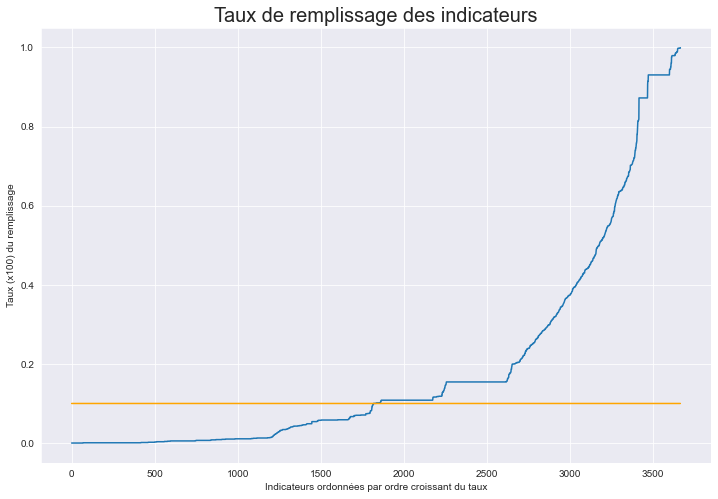

In [34]:
#Visualisation du taux de remplissage des indicateurs
plt.figure(figsize=(12, 8))
plt.plot(range(data_taux.shape[0]), data_taux['Taux de remplissage'])
plt.plot(range(data_taux.shape[0]), [0.1]*len(range(data_taux.shape[0])), color='orange', linewidth=1.5)
plt.title('Taux de remplissage des indicateurs', fontsize=20)
plt.xlabel('Indicateurs ordonnées par ordre croissant du taux')
plt.ylabel('Taux (x100) du remplissage')
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/line_ind_fill.png', bbox_inches='tight')
plt.show()

In [35]:
#Conservation des indicateurs avec un taux de remplissage supérieur à 10%
data_taux_filtered = data_taux[data_taux['Taux de remplissage']>0.1]

### Choix des indicateurs
Voici les indicateurs qu'on pourrait retenir selon 4 critères:
- **Education :** 'Gross enrolment ratio, early childhood education, both sexes (%)', ' Percentage of children under 5 years experiencing positive and stimulating home learning environments, both sexes (%)', 'All staff compensation as % of total expenditure in tertiary public institutions (%)', ' Capital expenditure as % of total expenditure in tertiary public institutions (%)', 'Government expenditure on education as % of GDP (%)', ' Literacy rate, population 25-64 years, both sexes (%)', 'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary'
- **Démographie :** 'Barro-Lee: Population in thousands, age 15-29, total'
- **PIB :** 'Human Capital Index (HCI) Score: Total (Scale 0-1)', 'GDP per capita (current USdollars)'
- **Accès internet :** 'Internet users (per 100 people)', 'Personal computers (per 100 people)'

In [36]:
#Vérification que les indicateurs repérés ont un taux de remplissage suffisant
ind_list = ['Gross enrolment ratio, early childhood education, both sexes (%)', 
            'Percentage of children under 5 years experiencing positive and stimulating home learning environments, both sexes (%)', 
            'All staff compensation as % of total expenditure in tertiary public institutions (%)', 
            'Capital expenditure as % of total expenditure in tertiary public institutions (%)', 
            'Government expenditure on education as % of GDP (%)', 'Literacy rate, population 25-64 years, both sexes (%)', 
            'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
            'Barro-Lee: Population in thousands, age 15-29, total', 'Population, total', 
            'Unemployment, total (% of total labor force)',
            'Human Capital Index (HCI) Score: Total (Scale 0-1)', 'GDP per capita (current US$)',
            'Internet users (per 100 people)', 'Personal computers (per 100 people)',
            'FDI (as a share of GDP (%))']

data_taux_filtered.loc[data_taux_filtered.index.isin(ind_list)]

,Size,Size*Cols,Taux de remplissage
Indicator Name,,,
"Barro-Lee: Population in thousands, age 15-29, total",88,1496,0.154412
Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,88,1496,0.154412
"Literacy rate, population 25-64 years, both sexes (%)",88,1496,0.199866
Capital expenditure as % of total expenditure in tertiary public institutions (%),88,1496,0.308155
All staff compensation as % of total expenditure in tertiary public institutions (%),88,1496,0.329545
Personal computers (per 100 people),88,1496,0.370321
Government expenditure on education as % of GDP (%),88,1496,0.570856
GDP per capita (current US$),88,1496,0.960561
Internet users (per 100 people),88,1496,0.977941


#### Voici donc les indicateurs que nous garderons :
- Government expenditure on education as % of GDP (%)
- Capital expenditure as % of total expenditure in tertiary public institutions (%)
- Barro-Lee: Population in thousands, age 15-29, total
- Unemployment, total (% of total labor force)
- GDP per capita (current USdollars)
- Internet users (per 100 people)
- FDI (as a share of GDP (%))

## 7/ Retrouvons la valeur la plus récente pour chaque indicateur de chaque pays

In [37]:
ind_list = ['Government expenditure on education as % of GDP (%)',
            'Capital expenditure as % of total expenditure in tertiary public institutions (%)',
            'Barro-Lee: Population in thousands, age 15-29, total',
            'Unemployment, total (% of total labor force)',
            'GDP per capita (current US$)',
            'Internet users (per 100 people)',
            'FDI inward position (%GDP)']

data_cleaned = data_cleaned[data_cleaned['Indicator Name'].isin(ind_list)].copy()
data_cleaned['Indicator value'] = data_cleaned[years_features].idxmax(axis=1).values
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned['Indicator value'].fillna(0, inplace=True)

In [38]:
for i, j in enumerate(data_cleaned['Indicator value']):
    if j==0:
        data_cleaned.loc[i, 'Indicator value'] = np.nan
    else:
        data_cleaned.loc[i, 'Indicator value'] = data_cleaned.loc[i, j]

In [39]:
#Table pivot pour simplifier la visualisation et le scoring
data_ind = data_cleaned.pivot(index='Country Name', columns='Indicator Name', values='Indicator value')

data_ind

Indicator Name,"Barro-Lee: Population in thousands, age 15-29, total",Capital expenditure as % of total expenditure in tertiary public institutions (%),FDI inward position (%GDP),GDP per capita (current US$),Government expenditure on education as % of GDP (%),Internet users (per 100 people),"Unemployment, total (% of total labor force)"
Country Name,,,,,,,
Afghanistan,9598.0,NaN,NaN,669.009051,3.78028,10.595726,8.6
Algeria,10889.0,NaN,NaN,5565.134521,4.35425,42.945527,29.799999
Angola,NaN,28.88596,NaN,4804.616884,3.47623,13.0,6.5
Argentina,10050.0,2.89038,25.547887,13467.102357,5.52189,70.150764,19.6
Australia,4399.0,14.19597,46.727664,67792.303862,5.55523,88.238658,6.7
...,...,...,...,...,...,...,...
"Venezuela, RB",7872.0,15.00012,NaN,15692.412878,6.87723,61.869248,16.799999
Vietnam,26375.0,18.166821,NaN,2214.387662,5.65873,46.5,2.8
"Yemen, Rep.",7222.0,NaN,NaN,1647.033657,9.65154,24.579208,17.799999


In [40]:
data_ind = data_ind.astype({c:'float' for c in data_ind.columns})

In [41]:
#Regardons s'il y a des erreurs extrêmes
data_ind.describe()

Indicator Name,"Barro-Lee: Population in thousands, age 15-29, total",Capital expenditure as % of total expenditure in tertiary public institutions (%),FDI inward position (%GDP),GDP per capita (current US$),Government expenditure on education as % of GDP (%),Internet users (per 100 people),"Unemployment, total (% of total labor force)"
count,77.000000,67.000000,29.000000,87.000000,80.000000,87.000000,87.000000
mean,20544.883117,20.189308,46.889766,11585.250609,5.108260,43.557745,10.241379
std,51429.992931,12.477059,34.530038,16470.507562,1.943866,27.554898,6.545059
min,1939.000000,2.454440,4.036836,312.748979,1.810940,0.000000,0.800000
25%,4128.000000,12.649845,25.785347,1265.164825,3.864458,20.615000,5.400000
50%,8275.000000,18.166821,35.895414,3844.891230,5.001130,39.697515,8.600000
75%,14196.000000,24.019640,58.137729,13678.979182,5.802715,63.939624,13.000000
max,324667.000000,57.083199,168.831703,67792.303862,14.059080,94.775801,29.799999


### Scoring en utilisant le ranking et la pondération

In [42]:
data_score = data_ind.rank(na_option='top')

#Détermination du poids de chaque indicateur
weight = pd.DataFrame(pd.Series([7, 4, 2, 5, 3, 6, 1], index=data_ind.columns, name='Weight'))

data_score['Score'] = data_score.dot(weight)
data_score['Score'] = np.round(data_score['Score'] / data_score['Score'].max(), 2)

data_score = data_score.merge(data_country[['Country Name', 'Country Code', 'Region']], how='left', 
                              left_on='Country Name', right_on='Country Name')

#Top 10 avec le scoring ranking
data_score_top10 = data_score.sort_values(by=['Score'], ascending=False).head(10)
data_score_top10

,Country Name,"Barro-Lee: Population in thousands, age 15-29, total",Capital expenditure as % of total expenditure in tertiary public institutions (%),FDI inward position (%GDP),GDP per capita (current US$),Government expenditure on education as % of GDP (%),Internet users (per 100 people),"Unemployment, total (% of total labor force)",Score,Country Code,Region
81,United States,86.0,37.0,72.0,87.0,59.0,73.0,50.0,1.00,USA,North America
40,Japan,78.0,63.0,60.0,83.0,26.0,85.0,23.0,0.97,JPN,East Asia & Pacific
44,"Korea, Rep.",65.0,66.0,61.0,76.0,51.0,86.0,16.5,0.96,KOR,East Asia & Pacific
70,Spain,56.0,65.0,78.0,78.0,43.0,79.0,84.0,0.95,ESP,Europe & Central Asia
28,Germany,70.0,36.0,70.0,81.0,47.0,83.0,57.0,0.94,DEU,Europe & Central Asia
27,France,64.0,38.0,69.0,80.0,67.0,80.0,55.0,0.94,FRA,Europe & Central Asia
9,Brazil,83.0,40.0,71.0,65.0,70.0,63.0,70.0,0.94,BRA,Latin America & Caribbean
80,United Kingdom,66.0,11.0,80.0,84.0,69.0,88.0,39.0,0.93,GBR,Europe & Central Asia
63,Russian Federation,81.0,44.0,73.0,69.0,32.0,74.0,54.0,0.92,RUS,Europe & Central Asia
18,Colombia,68.0,86.0,81.0,58.0,44.0,58.0,82.0,0.92,COL,Latin America & Caribbean


In [43]:
data_score.loc[data_score['Country Name'].isin(data_score_top10['Country Name']), 'Leaderboard'] = 'Top 10'
data_score['Leaderboard'].fillna('Non Top 10', inplace=True)

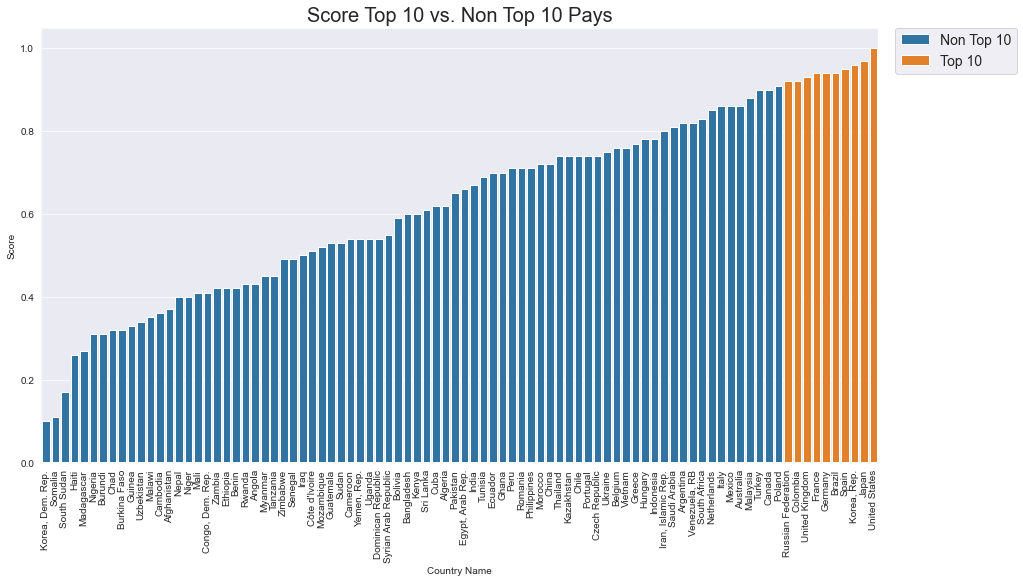

In [44]:
#Visualisation du score du Top 10 par rapport à tous les pays
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.barplot(data=data_score.sort_values(by='Score'), x='Country Name', y='Score', 
                hue='Leaderboard', dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.xticks(rotation=90)
plt.title('Score Top 10 vs. Non Top 10 Pays', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/bar_score.png', bbox_inches='tight')
plt.show()

## 8/ Visualisations

### Heatmap de corrélation des indicateurs et de Score

<AxesSubplot:>

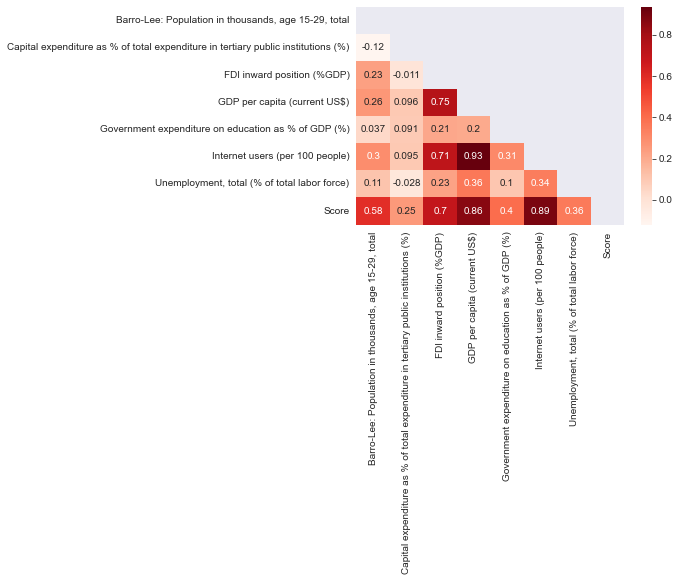

In [45]:
#Visualisation des corrélations entre les indicateurs et le score
heatmap_corr = sns.heatmap(data_score.corr(), annot=True, cmap='Reds', mask=np.triu(np.ones_like(data_score.corr(), 
                                                                                                dtype=bool)))
heatmap_corr.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/heatmp_corr.png', bbox_inches='tight')
heatmap_corr

### Visalisation map

In [46]:
import folium
import requests

In [47]:
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
response = requests.get(geojson_url)
geojson = response.json()

In [48]:
#Récupération des coordonnées Lat. et Long. de chaque pays
country_coord = pd.read_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/countries_codes_and_coordinates.csv')
country_coord = country_coord[['Alpha-3 code', 'Latitude (average)', 
                               'Longitude (average)']].apply(lambda x: x.str.replace('"', ''))
country_coord = country_coord[['Alpha-3 code', 'Latitude (average)', 
                               'Longitude (average)']].apply(lambda x: x.str.replace(' ', ''))

data_score = pd.merge(data_score, country_coord, how='left', left_on='Country Code', right_on='Alpha-3 code')
data_score.drop_duplicates(inplace=True)

In [49]:
data_score.columns

Index(['Country Name', 'Barro-Lee: Population in thousands, age 15-29, total',
       'Capital expenditure as % of total expenditure in tertiary public institutions (%)',
       'FDI inward position (%GDP)', 'GDP per capita (current US$)',
       'Government expenditure on education as % of GDP (%)',
       'Internet users (per 100 people)',
       'Unemployment, total (% of total labor force)', 'Score', 'Country Code',
       'Region', 'Leaderboard', 'Alpha-3 code', 'Latitude (average)',
       'Longitude (average)'],
      dtype='object')

In [50]:
Map = folium.Map(location=[20, 10], zoom_start=2)

folium.Choropleth(
    geo_data=geojson,
    data=data_score,
    columns=['Country Code', 'Score'],
    bins=9,
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Score'
).add_to(Map)

for i, code in data_score.iterrows():
    html = f"""
    <h4>{code['Country Name']}</h4>
    <h5>Score: {code['Score']}<br>
        Pop.: {code['Barro-Lee: Population in thousands, age 15-29, total']}<br>
        Exp. Ter.: {code['Capital expenditure as % of total expenditure in tertiary public institutions (%)']}<br>
        FDI: {code['FDI inward position (%GDP)']}<br>
        GDP: {code['GDP per capita (current US$)']}<br>
        Exp. Ed.: {code['Government expenditure on education as % of GDP (%)']}<br>
        Internet: {code['Internet users (per 100 people)']}<br>
        Unemployment: {code['Unemployment, total (% of total labor force)']}<h5>
    """
    iframe = folium.IFrame(html=html, width=160, height=185)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        location=[code['Latitude (average)'], code['Longitude (average)']],
        radius=5,
        popup=popup,
        tooltip=code['Country Name'], color='white', fill=True, fillOpacity=0.9, stroke=False
    ).add_to(Map)

Map.save('Map_P2_countries.html')
Map

## 10/ Analyse par région
- Intéressons nous aux indicateurs 'GDP per capita (current US$)' et 'Internet users (per 100 people)' car ils ont une forte corrélation avec notre Score
- Nous réalisons plusieurs visualisations (boxplot) pour ces indicateurs et le Score afin de se rendre compte de leur dispersion au sein d'une même région

In [51]:
from numpy import median

In [52]:
data_score_region = data_score.copy()

In [53]:
data_score_region.Region.value_counts()

Sub-Saharan Africa            28
Europe & Central Asia         18
Latin America & Caribbean     13
East Asia & Pacific           12
Middle East & North Africa     9
South Asia                     6
North America                  2
Name: Region, dtype: int64

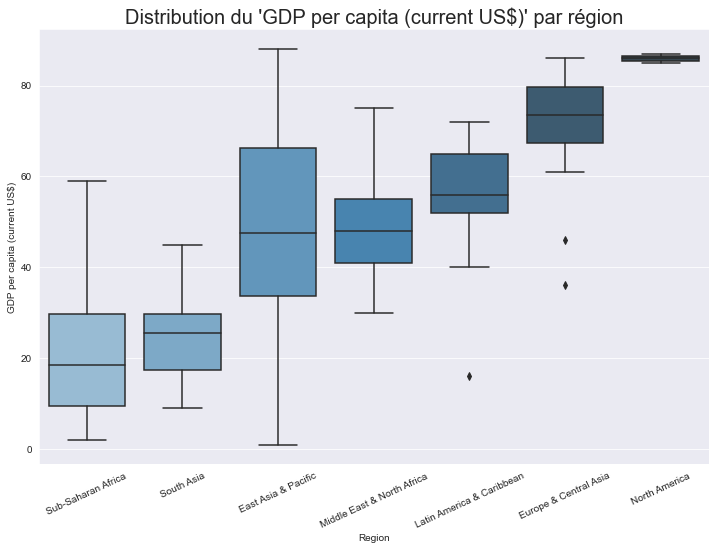

In [54]:
#Visualisation du GDP per capita (current US$) pour chaque région
plt.figure(figsize=(12, 8))
box_gdp = sns.boxplot(data=data_score_region, x='Region', y='GDP per capita (current US$)',
                      palette='Blues_d',
                      order=['Sub-Saharan Africa', 'South Asia', 'East Asia & Pacific', 'Middle East & North Africa',  
                             'Latin America & Caribbean', 'Europe & Central Asia', 'North America'])
plt.xticks(rotation=25)
plt.title("Distribution du 'GDP per capita (current US$)' par région", fontsize=20)
box_gdp.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/box_gdp.png', bbox_inches='tight')
plt.show()

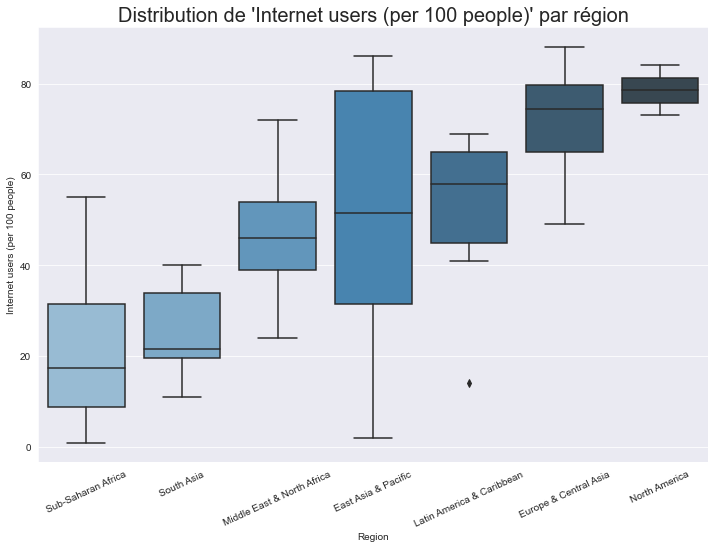

In [55]:
#Visualisation du 'Internet users (per 100 people)' pour chaque région
plt.figure(figsize=(12, 8))
box_int = sns.boxplot(data=data_score_region, x='Region', y='Internet users (per 100 people)',
                      palette='Blues_d',
                      order=['Sub-Saharan Africa', 'South Asia', 'Middle East & North Africa', 'East Asia & Pacific',
                             'Latin America & Caribbean', 'Europe & Central Asia', 'North America'])
plt.xticks(rotation=25)
plt.title("Distribution de 'Internet users (per 100 people)' par région", fontsize=20)
box_int.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/box_int.png', bbox_inches='tight')
plt.show()

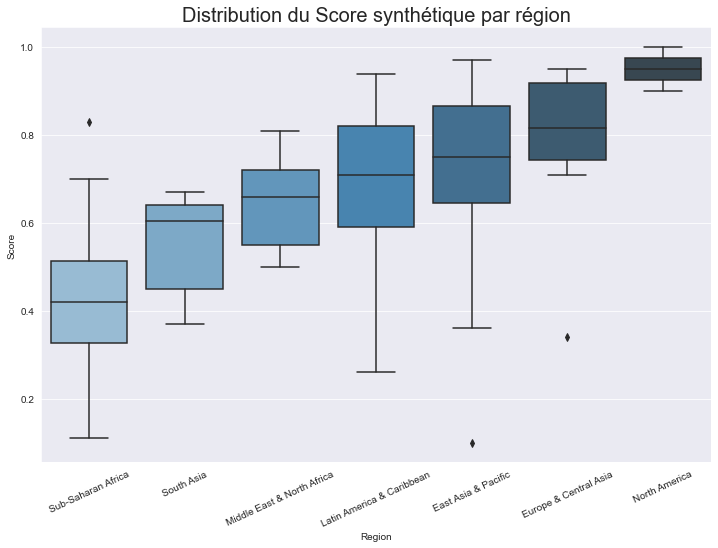

In [56]:
#Visualisation du Score synthétique pour chaque région
plt.figure(figsize=(12, 8))
box_score = sns.boxplot(data=data_score_region, x='Region', y='Score',
                        palette='Blues_d',
                        order=['Sub-Saharan Africa', 'South Asia', 'Middle East & North Africa', 'Latin America & Caribbean',
                               'East Asia & Pacific', 'Europe & Central Asia', 'North America'])
plt.xticks(rotation=25)
plt.title('Distribution du Score synthétique par région', fontsize=20)
box_score.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/box_score.png', bbox_inches='tight')
plt.show()

### Procédons au scoring pour chaque région

In [57]:
data_reg_gb = data_ind.copy()
data_reg_gb = data_reg_gb.merge(data_country[['Country Name', 'Region', 'Country Code']], how='left',
                                left_on='Country Name', right_on='Country Name')
data_reg_gb = data_reg_gb.merge(country_coord, how='left', left_on='Country Code', right_on='Alpha-3 code')
data_reg_gb.drop_duplicates(inplace=True)

data_reg_gb = data_reg_gb.astype({'Latitude (average)':'float', 'Longitude (average)':'float'})

In [58]:
agg_func = {'Barro-Lee: Population in thousands, age 15-29, total':'sum'}

for col in ['Capital expenditure as % of total expenditure in tertiary public institutions (%)',
           'FDI inward position (%GDP)', 'GDP per capita (current US$)',
           'Government expenditure on education as % of GDP (%)',
           'Internet users (per 100 people)',
           'Unemployment, total (% of total labor force)']:
    agg_func[col] = 'median'
    
for col in ['Latitude (average)', 'Longitude (average)']:
    agg_func[col] = 'mean'

data_reg_gb = data_reg_gb.groupby('Region').agg(agg_func)

In [59]:
#Calcul du Score
data_reg_score = data_reg_gb.copy()

for col in ind_list:
    data_reg_score[col] = data_reg_score[col].rank()

data_reg_score['Score Region'] = data_reg_score[ind_list].dot(weight)
data_reg_score['Score Region'] = np.round(data_reg_score['Score Region'] / data_reg_score['Score Region'].max(), 2)

In [60]:
data_reg_score.drop(columns=['Latitude (average)', 'Longitude (average)']).sort_values(by=['Score Region'], ascending=False)

,"Barro-Lee: Population in thousands, age 15-29, total",Capital expenditure as % of total expenditure in tertiary public institutions (%),FDI inward position (%GDP),GDP per capita (current US$),Government expenditure on education as % of GDP (%),Internet users (per 100 people),"Unemployment, total (% of total labor force)",Score Region
Region,,,,,,,,
Europe & Central Asia,5.0,3.0,5.0,6.0,2.0,6.0,5.0,1.00
East Asia & Pacific,7.0,5.0,2.0,4.0,4.0,4.0,1.0,0.97
North America,1.0,1.0,7.0,7.0,6.0,7.0,4.0,0.93
Latin America & Caribbean,4.0,2.0,4.0,5.0,5.0,5.0,6.0,0.90
South Asia,6.0,7.0,1.0,2.0,1.0,2.0,3.0,0.75
Middle East & North Africa,2.0,4.0,3.0,3.0,7.0,3.0,7.0,0.72
Sub-Saharan Africa,3.0,6.0,6.0,1.0,3.0,1.0,2.0,0.59


### Visualisation avec map

In [61]:
data_reg_score.reset_index(inplace=True)
data_score = data_score.merge(data_reg_score[['Region', 'Score Region']], 
                              how='left', left_on='Region', right_on='Region')

In [62]:
Map_Reg = folium.Map(location=[20, 10], zoom_start=2)

folium.Choropleth(
    geo_data=geojson,
    data=data_score,
    columns=['Country Code', 'Score Region'],
    bins=9,
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Score'
).add_to(Map_Reg)

for i, code in data_score.iterrows():
    html = f"""
    <h4>{code['Country Name']}</h4>
    <h5>Score: {code['Score']}<br>
        Pop.: {code['Barro-Lee: Population in thousands, age 15-29, total']}<br>
        Exp. Ter.: {code['Capital expenditure as % of total expenditure in tertiary public institutions (%)']}<br>
        FDI: {code['FDI inward position (%GDP)']}<br>
        GDP: {code['GDP per capita (current US$)']}<br>
        Exp. Ed.: {code['Government expenditure on education as % of GDP (%)']}<br>
        Internet: {code['Internet users (per 100 people)']}<br>
        Unemployment: {code['Unemployment, total (% of total labor force)']}<h5>
    """
    iframe = folium.IFrame(html=html, width=160, height=185)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        location=[code['Latitude (average)'], code['Longitude (average)']],
        radius=5,
        popup=popup,
        tooltip=code['Country Name'], color='white', fill=True, fill_color='grey', opacity=0.2, fullOpacity=0.2
    ).add_to(Map_Reg)
    
for i, code in data_reg_score.iterrows():
    html = f"""
    <h4>{code['Region']}</h4>
    <h5>Score: {code['Score Region']}<br>
        Pop.: {code['Barro-Lee: Population in thousands, age 15-29, total']}<br>
        Exp. Ter.: {code['Capital expenditure as % of total expenditure in tertiary public institutions (%)']}<br>
        FDI: {code['FDI inward position (%GDP)']}<br>
        GDP: {code['GDP per capita (current US$)']}<br>
        Exp. Ed.: {code['Government expenditure on education as % of GDP (%)']}<br>
        Internet: {code['Internet users (per 100 people)']}<br>
        Unemployment: {code['Unemployment, total (% of total labor force)']}<h5>
    """
    iframe = folium.IFrame(html=html, width=160, height=185)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        location=[code['Latitude (average)'], code['Longitude (average)']],
        radius=8,
        popup=popup,
        tooltip=code['Region'], color='blue', fill=True, fullOpacity=1.5, opacity=0.4
    ).add_to(Map_Reg)

Map_Reg.save('Map_P2_Regions.html')
Map_Reg

### Création d'une fonction pour obtenir une map interactive selon la région choisie

In [63]:
def region_score_map(region='North America'):
    '''
    Fonction permettant de visualiser une map sur une région choisie
    @param region : région que l'on veut cibler et visualiser
    '''
    data_bis = data.copy()
    #Nettoyer les pays qui n'en sont pas
    data_bis = data_bis[~data_bis['Country Name'].isin(not_a_country)]
    #Nettoyer les années
    data_bis = data_bis.drop(columns=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', 
                                  '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', 
                                  '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2017', '2020', '2025', 
                                  '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', 
                                  '2085', '2090', '2095', '2100'])
    #Agrégation de l'indicateur Barro-Lee sur la population
    years_features = data_bis.select_dtypes(include='float64').columns.tolist()

    barrolee_ind =['Barro-Lee: Population in thousands, age 15-19, total',
                   'Barro-Lee: Population in thousands, age 20-24, total',
                   'Barro-Lee: Population in thousands, age 25-29, total']
    
    barrolee_pop = data_bis[data_bis['Indicator Name'].isin(barrolee_ind)].groupby('Country Name',
                                                                                   as_index=False)[years_features].sum()

    barrolee_pop['Indicator Name'] = 'Barro-Lee: Population in thousands, age 15-29, total'
    barrolee_pop['Indicator Code'] = 'BAR.POP.1529'
    barrolee_pop = barrolee_pop.merge(data_country[['Country Name', 'Country Code']], how='left', 
                                  left_on='Country Name', right_on='Country Name')
    barrolee_pop.replace(0, np.nan, inplace=True)
    
    #Ajout de l'indicateur à la df principale
    data_bis = pd.concat([data_bis, barrolee_pop])
    #Ajout de l'indicateur FDI à la df principale
    data_bis = pd.concat([data_bis, data_fdi])
    #Sélection des indicateurs cibles
    data_bis = data_bis[data_bis['Indicator Name'].isin(ind_list)].copy()
    #Recherche de la dernière valeur référencée
    data_bis['Indicator value'] = data_bis[years_features].idxmax(axis=1).values
    data_bis.reset_index(drop=True, inplace=True)
    data_bis['Indicator value'].fillna(0, inplace=True)

    for i, j in enumerate(data_bis['Indicator value']):
        if j==0:
            data_bis.loc[i, 'Indicator value'] = np.nan
        else:
            data_bis.loc[i, 'Indicator value'] = data_bis.loc[i, j]
    #Pivot  
    data_bis_pivot = data_bis.pivot(index='Country Name', columns='Indicator Name', values='Indicator value')
    #Ajout des variables Country Code et Region à la table pivot
    data_bis_pivot = data_bis_pivot.merge(data_country[['Country Name', 'Country Code', 'Region']], how='left', 
                                          left_on='Country Name', right_on='Country Name')
    #Ajout des coorddonées (Lat. et Long.)
    data_bis_pivot = pd.merge(data_bis_pivot, country_coord, how='left', left_on='Country Code', right_on='Alpha-3 code')
    data_bis_pivot.drop_duplicates(inplace=True)
    #Suppression des valeurs manquantes (Code et coordonnées)
    data_bis_pivot.dropna(subset=['Country Code', 'Region', 'Alpha-3 code'], inplace=True)
    #Conversion des coordonnées en valeurs numériques
    data_bis_pivot = data_bis_pivot.astype({'Latitude (average)':'float', 'Longitude (average)':'float'})
    #
    data_full = data_bis_pivot.copy()
 
    #Création DF agrégée pour les régions (à utiliser si visualisation de toutes les régions)
    agg_func = {'Barro-Lee: Population in thousands, age 15-29, total':'sum'}

    for col in ['Capital expenditure as % of total expenditure in tertiary public institutions (%)',
                'FDI inward position (%GDP)', 'GDP per capita (current US$)',
                'Government expenditure on education as % of GDP (%)',
                'Internet users (per 100 people)',
                'Unemployment, total (% of total labor force)']:
        agg_func[col] = 'median'
    
    for col in ['Latitude (average)', 'Longitude (average)']:
        agg_func[col] = 'mean'

    data_allreg = data_full.groupby('Region').agg(agg_func)
    #Scoring par région
    data_score_reg = data_allreg.copy()

    for col in ind_list:
        data_score_reg[col] = data_score_reg[col].rank()
        
    data_score_reg['Score Region'] = data_score_reg[ind_list].dot(weight)
    data_score_reg['Score Region'] = np.round(data_score_reg['Score Region'] / data_score_reg['Score Region'].max(), 2)
    data_score_reg.reset_index(inplace=True)
    data_full = data_full.merge(data_score_reg[['Region', 'Score Region']], 
                                how='left', left_on='Region', right_on='Region')

    #Création DF pour la région choisie
    data_score = data_full[data_full['Region']==region].copy()
    
    for col in ind_list:
        data_score[col] = data_score[col].rank(na_option='top')

    data_score['Score'] = data_score[ind_list].dot(weight)
    data_score['Score'] = np.round(data_score['Score'] / data_score['Score'].max(), 2)
        
    #Création de la map
    if region == 'All':
        Map = folium.Map(location=[20, 10], zoom_start=2)

        folium.Choropleth(
            geo_data=geojson,
            data=data_full,
            columns=['Country Code', 'Score Region'],
            bins=9,
            key_on='feature.id',
            fill_color='YlOrRd',
            fill_opacity=0.8,
            line_opacity=0.2,
            legend_name='Score'
        ).add_to(Map)
    
        for i, code in data_score_reg.iterrows():
            html = f"""
            <h4>{code['Region']}</h4>
            <h5>Score: {code['Score Region']}<br>
                Pop.: {code['Barro-Lee: Population in thousands, age 15-29, total']}<br>
                Exp. Ter.: {code['Capital expenditure as % of total expenditure in tertiary public institutions (%)']}<br>
                FDI: {code['FDI inward position (%GDP)']}<br>
                GDP: {code['GDP per capita (current US$)']}<br>
                Exp. Ed.: {code['Government expenditure on education as % of GDP (%)']}<br>
                Internet: {code['Internet users (per 100 people)']}<br>
                Unemployment: {code['Unemployment, total (% of total labor force)']}<h5>
            """
            iframe = folium.IFrame(html=html, width=160, height=185)
            popup = folium.Popup(iframe, max_width=2650)
            folium.CircleMarker(
                location=[code['Latitude (average)'], code['Longitude (average)']],
                radius=8,
                popup=popup,
                tooltip=code['Region'], color='blue', fill=True, fullOpacity=1.5, opacity=0.4
            ).add_to(Map)
        
        df = data_score_reg.drop(columns=['Latitude (average)', 'Longitude (average)']).sort_values(by='Score Region',
                                                                                                    ascending=False).copy()
        
    else:
        Map = folium.Map(location=[data_score_reg.loc[data_score_reg['Region']==region, 'Latitude (average)'],
                                   data_score_reg.loc[data_score_reg['Region']==region, 'Longitude (average)']], zoom_start=4)
                         
        folium.Choropleth(
            geo_data=geojson,
            data=data_score,
            columns=['Country Code', 'Score'],
            bins=9,
            key_on='feature.id',
            fill_color='YlOrRd',
            fill_opacity=0.8,
            line_opacity=0.2,
            legend_name='Score'
        ).add_to(Map)
    
        for i, code in data_score.iterrows():
            html = f"""
            <h4>{code['Country Name']}</h4>
            <h5>Score: {code['Score']}<br>
                Pop.: {code['Barro-Lee: Population in thousands, age 15-29, total']}<br>
                Exp. Ter.: {code['Capital expenditure as % of total expenditure in tertiary public institutions (%)']}<br>
                FDI: {code['FDI inward position (%GDP)']}<br>
                GDP: {code['GDP per capita (current US$)']}<br>
                Exp. Ed.: {code['Government expenditure on education as % of GDP (%)']}<br>
                Internet: {code['Internet users (per 100 people)']}<br>
                Unemployment: {code['Unemployment, total (% of total labor force)']}<h5>
            """
            iframe = folium.IFrame(html=html, width=160, height=185)
            popup = folium.Popup(iframe, max_width=2650)
            folium.CircleMarker(
                location=[code['Latitude (average)'], code['Longitude (average)']],
                radius=5,
                popup=popup,
                tooltip=code['Country Name'], color='white', fill=True, fill_color='grey', opacity=0.2, fullOpacity=0.2
            ).add_to(Map)
            
        df = data_score.drop(columns=['Country Code', 'Region', 'Alpha-3 code', 'Latitude (average)', 
                                      'Longitude (average)', 'Score Region']).sort_values(by='Score', ascending=False).copy()
        
    return df, Map

In [79]:
d_, m_ = region_score_map(region='Europe & Central Asia')

In [80]:
m_

In [66]:
d_

,Region,"Barro-Lee: Population in thousands, age 15-29, total",Capital expenditure as % of total expenditure in tertiary public institutions (%),FDI inward position (%GDP),GDP per capita (current US$),Government expenditure on education as % of GDP (%),Internet users (per 100 people),"Unemployment, total (% of total labor force)",Score Region
1,Europe & Central Asia,5.0,2.0,6.0,6.0,3.0,6.0,5.0,1.00
0,East Asia & Pacific,7.0,6.0,2.0,3.0,6.0,3.0,2.0,0.96
4,North America,1.0,1.0,7.0,7.0,7.0,7.0,4.0,0.94
2,Latin America & Caribbean,4.0,3.0,5.0,5.0,4.0,4.0,6.0,0.87
3,Middle East & North Africa,2.0,4.0,3.0,4.0,5.0,5.0,7.0,0.80
5,South Asia,6.0,7.0,1.0,2.0,1.0,2.0,1.0,0.73
6,Sub-Saharan Africa,3.0,5.0,4.0,1.0,2.0,1.0,3.0,0.51


## 9/ Est-ce que ces pays seront toujours des cibles intéressantes dans le futur ?
- Il nous reste un seul indicateur pour la projection, ce qui est insuffisant pour tirer des conclusions

In [67]:
data_future = data.copy()
data_future = data_future[~data_future['Country Name'].isin(not_a_country)]
data_future = data_future[data_future['Country Name'].isin(data_pop['Country Name'].unique())]

In [68]:
#Ajoutons l'indicateur agrégé Barro-Lee sur la population sur les tranches d'âges cibles
years_features = data_future.select_dtypes(include='float64').columns.tolist()

barrolee_ind = ['Barro-Lee: Population in thousands, age 15-19, total',
                'Barro-Lee: Population in thousands, age 20-24, total',
                'Barro-Lee: Population in thousands, age 25-29, total']

barrolee_pop = data_future[data_future['Indicator Name'].isin(barrolee_ind)].groupby('Country Name',
                                                                                     as_index=False)[years_features].sum()

barrolee_pop['Indicator Name'] = 'Barro-Lee: Population in thousands, age 15-29, total'
barrolee_pop['Indicator Code'] = 'BAR.POP.1529'
barrolee_pop = barrolee_pop.merge(data_country[['Country Name', 'Country Code']], how='left', 
                                  left_on='Country Name', right_on='Country Name')
barrolee_pop.replace(0, np.nan, inplace=True)

data_future = pd.concat([data_future, barrolee_pop])

In [69]:
#Ajout de l'indicateur FDI
data_future = pd.concat([data_future, data_fdi_bis])

In [70]:
data_future = data_future.drop(columns=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', 
                                        '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
                                        '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', 
                                        '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                                        '2010', '2011', '2012', '2013', '2014', '2015', '2016'])

In [71]:
data_future.reset_index(drop=True, inplace=True)

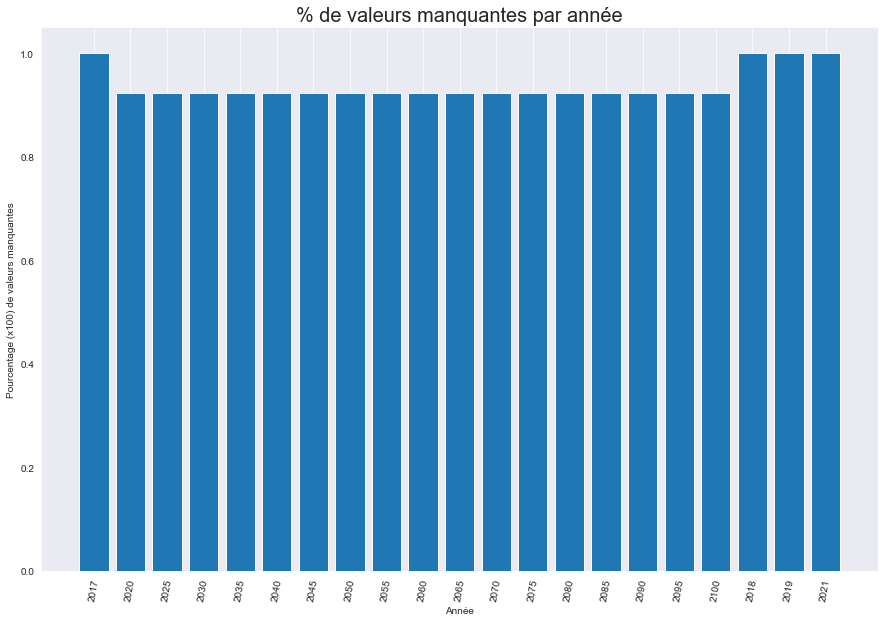

In [72]:
#Visualisation des valeurs manquantes par années
future_years = data_future.select_dtypes(include='float64').copy()

plt.figure(figsize=(15,10))
plt.bar(future_years.columns, future_years.isna().mean())
plt.grid(axis='y')
plt.xlabel('Année')
plt.ylabel('Pourcentage (x100) de valeurs manquantes')
plt.xticks(rotation=80)
plt.title('% de valeurs manquantes par année', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/bar_futureyear_nan.png', bbox_inches='tight')
plt.show()

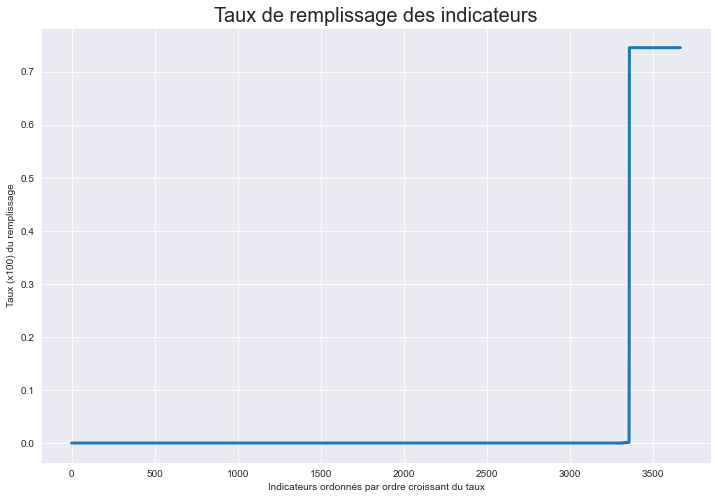

In [73]:
#Calcul du taux de remplissage de chaque indicateur
future_years = data_future.select_dtypes(include='float64').columns.to_list()

data_taux = data_future.groupby('Indicator Name').agg({'Country Name':'count'}).rename(columns={'Country Name':'Size'})
data_taux['Size*Cols'] = data_taux['Size'] * len(future_years)

data_taux['Taux de remplissage'] = (data_future.groupby('Indicator Name')[future_years].count().sum(axis=1).values) / data_taux['Size*Cols']
data_taux.sort_values(by='Taux de remplissage', inplace=True)

#Visualisation du taux de remplissage des indicateurs
plt.figure(figsize=(12, 8))
plt.plot(range(data_taux.shape[0]), data_taux['Taux de remplissage'], linewidth=3)
plt.title('Taux de remplissage des indicateurs', fontsize=20)
plt.ylabel('Taux (x100) du remplissage')
plt.xlabel('Indicateurs ordonnés par ordre croissant du taux')
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/line_futureind_fill.png', bbox_inches='tight')
plt.show()

In [74]:
data_taux[['Taux de remplissage']][data_taux.index.isin(ind_list)]

,Taux de remplissage
Indicator Name,
"Unemployment, total (% of total labor force)",0.000000
Capital expenditure as % of total expenditure in tertiary public institutions (%),0.000000
"Barro-Lee: Population in thousands, age 15-29, total",0.000000
Internet users (per 100 people),0.000000
Government expenditure on education as % of GDP (%),0.000000
GDP per capita (current US$),0.000000
FDI inward position (%GDP),0.222898


In [75]:
data_future = data_future[data_future['Indicator Name'].isin(ind_list)]

data_future_top10 = data_future[data_future['Country Name'].isin(data_score_top10['Country Name'].unique())]

In [76]:
data_future_top10 = pd.melt(data_future_top10, id_vars=['Country Name', 'Indicator Name'], 
                            value_vars=data_future_top10.select_dtypes(include='float').columns,
                            var_name='Year', value_name='Value')
data_future_top10 = data_future_top10.astype({'Year':'int'})
data_future_top10['Year'] = pd.to_datetime(data_future_top10.Year, format='%Y')

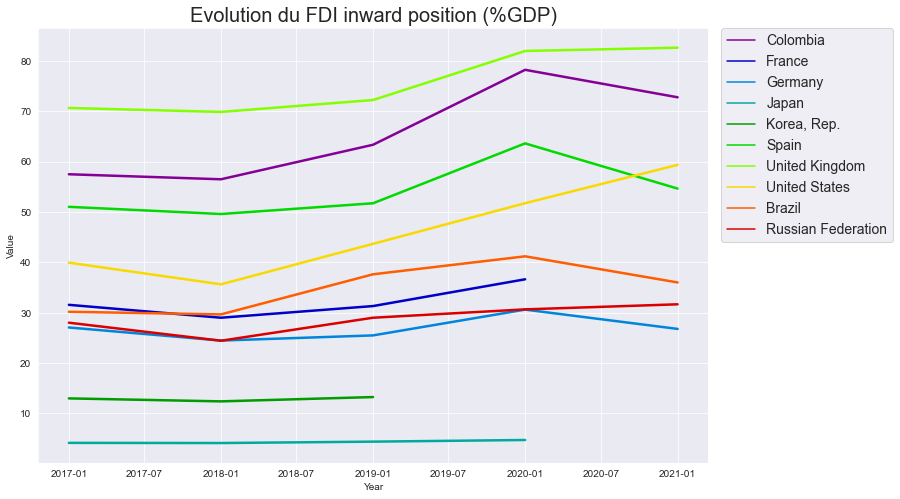

In [77]:
#Visualisation de l'indicateur FDI sur les années de projection
plt.figure(figsize=(12, 8))
fdi_future = sns.lineplot(data=data_future_top10[data_future_top10['Indicator Name']=='FDI inward position (%GDP)'],
                          x='Year', y='Value', hue='Country Name', linewidth=2.5, palette='nipy_spectral')
plt.title('Evolution du FDI inward position (%GDP)', fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14)
fdi_future.figure.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 2/line_fdifuture.png', bbox_inches='tight')
plt.show()